Index: 210170G<br>
Name:  W.A.R.T.Fonseka

<h1><center>Lab 02 - Regression<center></h1>

In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [422]:
test_data = pd.read_csv('train.csv')
df = pd.DataFrame(test_data)

In [423]:
# Examine the unique values in categorical variables.
cat_variables = df.select_dtypes(include='object').columns.tolist()[1:]

for col in cat_variables:
    print(col + ":" , df[col].unique().tolist())
    print("-" * 100)

Property_Type: ['Apartment', 'Bungalow', 'Single-family home', 'Duplex', '#R%$G&867', 'Container Home']
----------------------------------------------------------------------------------------------------
Furnishing: ['Semi_Furnished', 'Unfurnished', 'Fully Furnished', nan]
----------------------------------------------------------------------------------------------------
Power_Backup: ['No', 'Yes', 'NOT MENTIONED']
----------------------------------------------------------------------------------------------------
Water_Supply: ['Once in a day - Morning', 'Once in a day - Evening', 'All time', 'NOT MENTIONED', 'Once in two days']
----------------------------------------------------------------------------------------------------
Crime_Rate: ['Slightly below average', 'Well below average', 'Well above average', nan, 'Slightly above average']
----------------------------------------------------------------------------------------------------
Dust_and_Noise: ['Medium', nan, 'High', 'Low

In [424]:
df.replace('NOT MENTIONED', np.nan, inplace=True)
df.replace('#R%$G&867', np.nan, inplace=True)

<h3>Handle missing values</h3>

In [425]:
df.shape

(31599, 15)

In [426]:
for column in df.columns:
    print('Missing value count of ', column, df[df[column].isnull()].shape)
    print("-"*100)

Missing value count of  Id (0, 15)
----------------------------------------------------------------------------------------------------
Missing value count of  Property_Type (407, 15)
----------------------------------------------------------------------------------------------------
Missing value count of  Property_Area (0, 15)
----------------------------------------------------------------------------------------------------
Missing value count of  Number_of_Windows (1333, 15)
----------------------------------------------------------------------------------------------------
Missing value count of  Number_of_Doors (0, 15)
----------------------------------------------------------------------------------------------------
Missing value count of  Furnishing (828, 15)
----------------------------------------------------------------------------------------------------
Missing value count of  Frequency_of_Powercuts (1109, 15)
-------------------------------------------------------------

In [427]:
df

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31594,0x4dbe,Apartment,851,4.0,1,Semi_Furnished,0.0,No,All time,7.80,Well below average,Medium,149.0,4.72,73.12
31595,0x41b3,Container Home,315,1.0,1,Fully Furnished,0.0,Yes,Once in a day - Morning,5.92,Well below average,Medium,82.0,4.50,95.40
31596,0x8531,Duplex,480,6.0,3,Semi_Furnished,0.0,No,Once in two days,5.68,Well below average,Medium,80.0,3.88,81.29
31597,0x2537,Apartment,642,1.0,2,Semi_Furnished,1.0,No,Once in a day - Morning,7.09,Well below average,Medium,162.0,3.76,82.80


In [428]:
# Fill missing values of Number_of_Windows by it's mean
df['Number_of_Windows'] = df['Number_of_Windows'].fillna(df['Number_of_Windows'].mean())

# Fill missing values of Dust_and_Nouse by 'Medium'
df['Dust_and_Noise'] = df['Dust_and_Noise'].fillna('Medium')

# Fill missing values of Property type randomly acording to it's proportion of each catagory
probability = list(df.Property_Type.value_counts(normalize=True).values)
df['Property_Type'] = df['Property_Type'].apply(lambda x: np.random.choice(df['Property_Type'].dropna().unique(), 1, replace=False, p=probability)[0] if pd.isna(x) else x)


We cannot fill other missing values because that features are more important. If we fill missing value using some method it's may be lead to decrement of our model accuracy. So simply I will remove them.

In [429]:
df.dropna(inplace=True)

In [430]:
df.shape

(28239, 15)

In [431]:
# We do not need Id. so remove it
df = df.drop(columns=['Id'])

<h3>Feature Encoding</h3>

In [432]:
# df = pd.get_dummies(df, columns = ['Property_Type'])
mapping = {
    'Apartment': 1,
    'Bungalow': 2,
    'Container Home': 3,
    'Duplex': 4,
    'Single-family home': 5
}
df['Property_Type'] = df['Property_Type'].map(mapping)


mapping = {'Unfurnished': 1, 'Semi_Furnished': 2, 'Fully Furnished': 3}
df['Furnishing'] = df['Furnishing'].map(mapping)

mapping = {'Yes': 1, 'No': 0}
df['Power_Backup'] = df['Power_Backup'].map(mapping)

mapping = {'Once in two days': 1, 'Once in a day - Evening': 2, 'Once in a day - Morning': 2, 'All time': 3}
df['Water_Supply'] = df['Water_Supply'].map(mapping)

mapping = {'Well above average': 1, 'Slightly above average': 2, 'Slightly below average': 3, 'Well below average': 4}
df['Crime_Rate'] = df['Crime_Rate'].map(mapping)

mapping = {'High': 1, 'Medium': 2, 'Low': 3}
df['Dust_and_Noise'] = df['Dust_and_Noise'].map(mapping)

In [433]:
df.head()

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,1,106,3.926254,1,2,0.0,0,2,5.89,3,2,90.0,3.86,71.98
1,1,733,2.000000,2,1,1.0,0,2,4.37,4,2,96.0,3.55,71.20
2,1,737,4.000000,2,3,0.0,0,2,7.45,3,2,121.0,3.81,71.39
3,1,900,3.000000,2,1,2.0,1,2,6.16,1,2,100.0,1.34,31.46
4,2,2238,14.000000,6,3,0.0,0,3,5.46,4,2,116.0,4.77,93.70


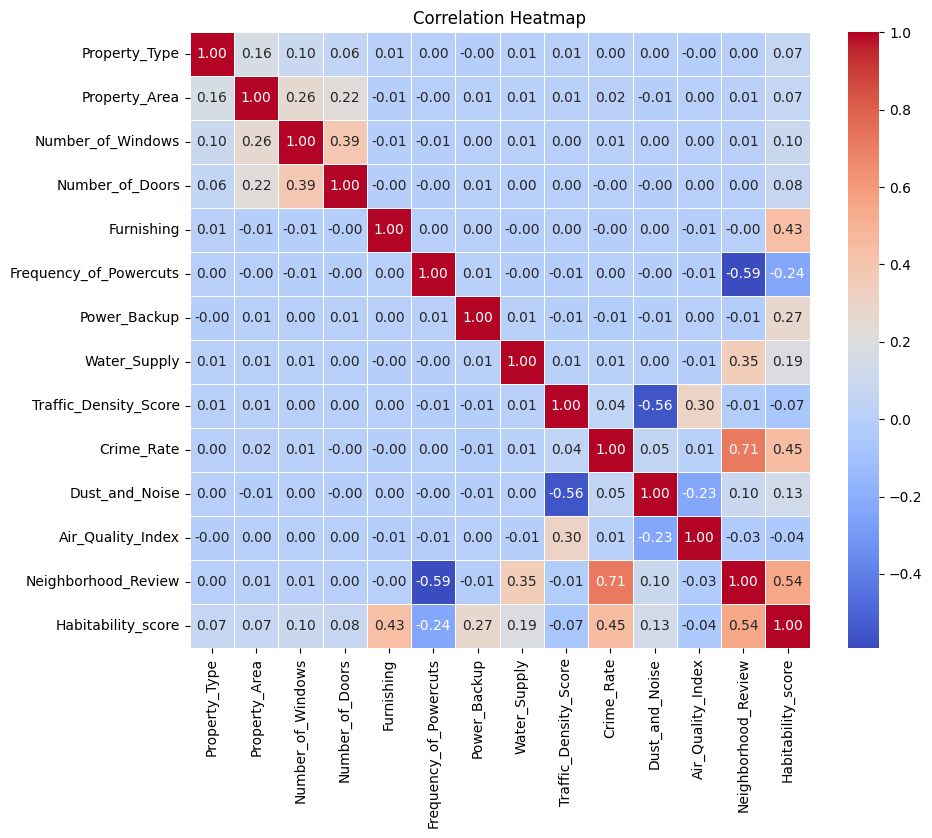

In [434]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<h3>Evaluate model performance and select model</h3>

In [436]:
from sklearn.model_selection import train_test_split

y = df['Habitability_score']
X = df.drop(columns=['Habitability_score'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [437]:
# Evaluation metrics
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [438]:
# Model
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

In [439]:
RMSE = []
MAE = []
MSE = []
R2S = []
Model = ['LinearRegression', 'XGBRegressor', 'RandomForestRegressor','SVR', 'MLPRegressor', 'KNeighborsRegressor']

Linear Regressor

In [440]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

RMSE.append(root_mean_squared_error(y_valid, y_pred))
MAE.append(mean_absolute_error(y_valid, y_pred))
MSE.append(mean_squared_error(y_valid, y_pred))
R2S.append(r2_score(y_valid, y_pred))


XGBoost Regressor

In [441]:
def_xgb_model = XGBRegressor(objective='reg:squarederror',random_state=42)
def_xgb_model.fit(X_train, y_train)

y_pred = def_xgb_model.predict(X_valid)

RMSE.append(root_mean_squared_error(y_valid, y_pred))
MAE.append(mean_absolute_error(y_valid, y_pred))
MSE.append(mean_squared_error(y_valid, y_pred))
R2S.append(r2_score(y_valid, y_pred))

RansomForest Reressor

In [442]:
def_rf_model = RandomForestRegressor(n_estimators=450, random_state=42)
def_rf_model.fit(X_train, y_train)
y_pred = def_rf_model.predict(X_valid)

RMSE.append(root_mean_squared_error(y_valid, y_pred))
MAE.append(mean_absolute_error(y_valid, y_pred))
MSE.append(mean_squared_error(y_valid, y_pred))
R2S.append(r2_score(y_valid, y_pred))

SVR Regressor

In [443]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

RMSE.append(root_mean_squared_error(y_valid, y_pred))
MAE.append(mean_absolute_error(y_valid, y_pred))
MSE.append(mean_squared_error(y_valid, y_pred))
R2S.append(r2_score(y_valid, y_pred))

MLP Regressor

In [444]:
model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

RMSE.append(root_mean_squared_error(y_valid, y_pred))
MAE.append(mean_absolute_error(y_valid, y_pred))
MSE.append(mean_squared_error(y_valid, y_pred))
R2S.append(r2_score(y_valid, y_pred))

KNN Regressor

In [445]:
knn_model = KNeighborsRegressor(n_neighbors=100)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_valid)

RMSE.append(root_mean_squared_error(y_valid, y_pred))
MAE.append(mean_absolute_error(y_valid, y_pred))
MSE.append(mean_squared_error(y_valid, y_pred))
R2S.append(r2_score(y_valid, y_pred))

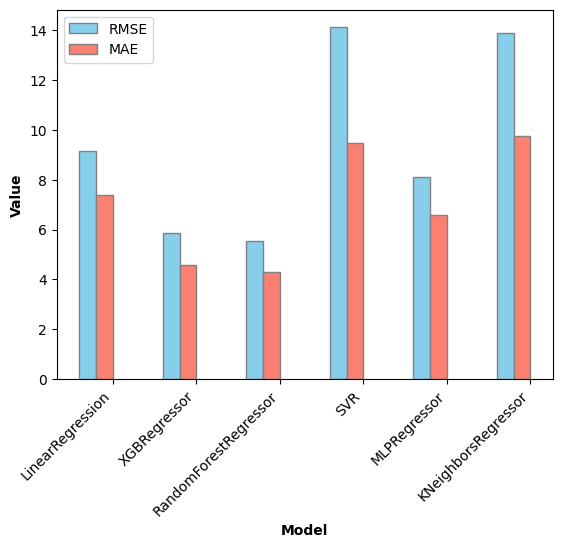

In [446]:
bar_width = 0.2

r1 = np.arange(len(Model))
r2 = [x + bar_width for x in r1]

plt.bar(r1, RMSE, color='skyblue', width=bar_width, edgecolor='grey', label='RMSE')
plt.bar(r2, MAE, color='salmon', width=bar_width, edgecolor='grey', label='MAE')

plt.xlabel('Model', fontweight='bold')
plt.xticks([r + 1.5 * bar_width for r in range(len(Model))], Model, rotation=45, ha='right')

plt.ylabel('Value', fontweight='bold')

plt.legend()

plt.show()


We can see clearly XGBRegressor and RandomForestRegressor both Root Mean Square Error and Mean Absolute Error are minimum.

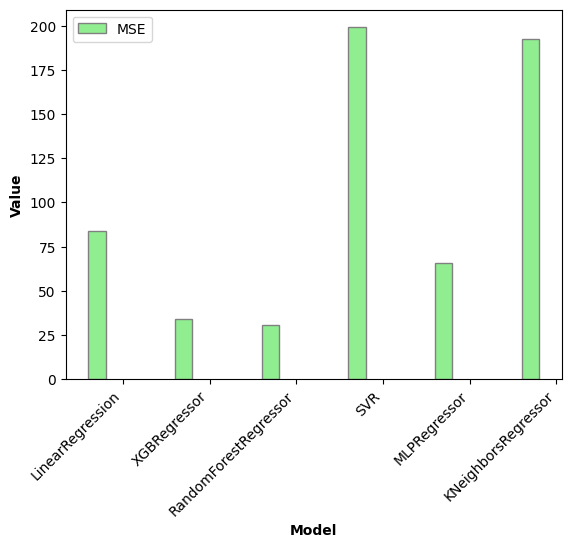

In [447]:
plt.bar(np.arange(len(Model)), MSE, color='lightgreen', width=bar_width, edgecolor='grey', label='MSE')

plt.xlabel('Model', fontweight='bold')
plt.xticks([r + 1.5 * bar_width for r in range(len(Model))], Model, rotation=45, ha='right')

plt.ylabel('Value', fontweight='bold')

plt.legend()

plt.show()


Similary Mean squre error is mimum in XGBRegressor and RandomForestRegressor.

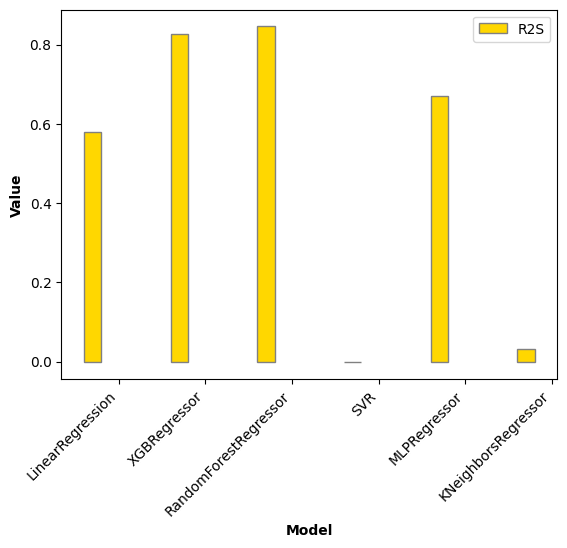

In [448]:
plt.bar(np.arange(len(Model)), R2S, color='gold', width=bar_width, edgecolor='grey', label='R2S')
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + 1.5 * bar_width for r in range(len(Model))], Model, rotation=45, ha='right')

plt.ylabel('Value', fontweight='bold')

plt.legend()

plt.show()

In XGBRegressor and RandomForestRegressor R2S value is higher than others. That mean model explains a larger proportion of the variance in the dependent variable and therefore is better at predicting the target variable.

Since XGBRegressor and RandomForestRegressor overall performance is better than others, I use them.

In [449]:
RMSE = RMSE[1:3]
MAE = MAE[1:3]
MSE = MSE[1:3]
R2S = R2S[1:3]
Model = Model[1:3]
Model[0] = 'XGBRegressor(Default Param)'
Model[1] = 'RandomForestRegressor(Default Param)'

<h3>Hyperparameter Tuning</h3>

Hyperparameter training and feature selection consume more time. So I found them using seprate nodebook (so i can countinue working on this note book) and it reasult get here.

In [450]:
tune_xgb_model = XGBRegressor(objective='reg:squarederror', colsample_bytree= 1.0, gamma= 0.1, learning_rate= 0.05, max_depth= 10, min_child_weight= 5, n_estimators= 100, reg_alpha= 0, reg_lambda= 0.5, subsample= 0.8 ,random_state=42)
tune_xgb_model.fit(X_train, y_train)
y_pred = tune_xgb_model.predict(X_valid)

Model.append('XGBRegressor(Tuned hyperparam)')
RMSE.append(root_mean_squared_error(y_valid, y_pred))
MAE.append(mean_absolute_error(y_valid, y_pred))
MSE.append(mean_squared_error(y_valid, y_pred))
R2S.append(r2_score(y_valid, y_pred))

In [451]:
selected_features = ['Property_Area', 'Number_of_Windows', 'Furnishing',
       'Frequency_of_Powercuts', 'Power_Backup', 'Water_Supply',
       'Traffic_Density_Score', 'Crime_Rate', 'Dust_and_Noise',
       'Neighborhood_Review', 'Property_Type']

In [452]:
Fselect_xgb_model = XGBRegressor(objective='reg:squarederror', colsample_bytree= 1.0, gamma= 0.1, learning_rate= 0.05, max_depth= 10, min_child_weight= 5, n_estimators= 100, reg_alpha= 0, reg_lambda= 0.5, subsample= 0.8 ,random_state=42)
Fselect_xgb_model.fit(X_train[selected_features], y_train)
y_pred = Fselect_xgb_model.predict(X_valid[selected_features])

Model.append('XGBRegressor(with selected features)')
RMSE.append(root_mean_squared_error(y_valid, y_pred))
MAE.append(mean_absolute_error(y_valid, y_pred))
MSE.append(mean_squared_error(y_valid, y_pred))
R2S.append(r2_score(y_valid, y_pred))

In [453]:
tune_rf_model = RandomForestRegressor(bootstrap= False, max_depth= 20, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 450, random_state=42)
tune_rf_model.fit(X_train, y_train)
y_pred = tune_rf_model.predict(X_valid)

Model.append('RandomForestRegressor(Tuned hyperparam)')
RMSE.append(root_mean_squared_error(y_valid, y_pred))
MAE.append(mean_absolute_error(y_valid, y_pred))
MSE.append(mean_squared_error(y_valid, y_pred))
R2S.append(r2_score(y_valid, y_pred))

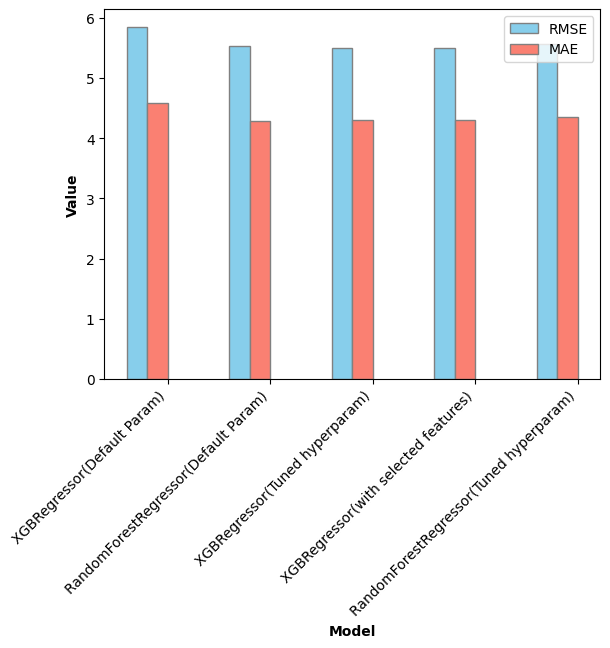

In [454]:
bar_width = 0.2

r1 = np.arange(len(Model))
r2 = [x + bar_width for x in r1]

plt.bar(r1, RMSE, color='skyblue', width=bar_width, edgecolor='grey', label='RMSE')
plt.bar(r2, MAE, color='salmon', width=bar_width, edgecolor='grey', label='MAE')

plt.xlabel('Model', fontweight='bold')
plt.xticks([r + 1.5 * bar_width for r in range(len(Model))], Model, rotation=45, ha='right')

plt.ylabel('Value', fontweight='bold')

plt.legend()

plt.show()


In [455]:
RMSE

[5.852214651025172,
 5.5358527500629835,
 5.507913268503039,
 5.505670839322852,
 5.572843975739361]

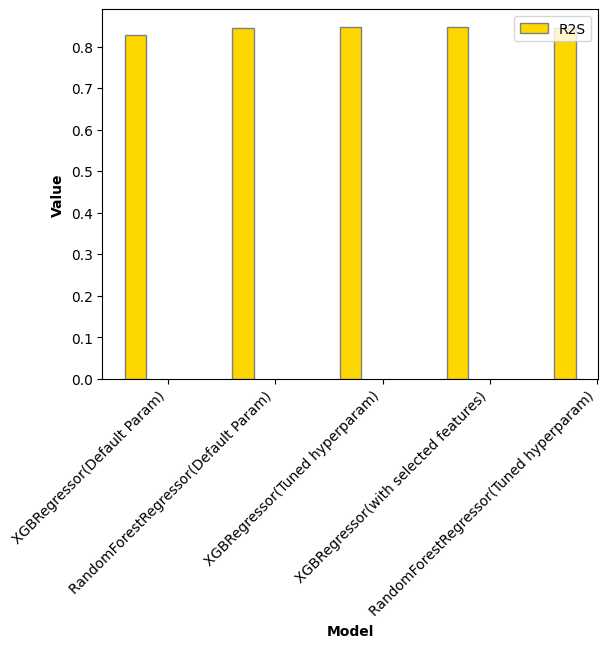

In [456]:
plt.bar(np.arange(len(Model)), R2S, color='gold', width=bar_width, edgecolor='grey', label='R2S')
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + 1.5 * bar_width for r in range(len(Model))], Model, rotation=45, ha='right')

plt.ylabel('Value', fontweight='bold')

plt.legend()

plt.show()

Hyperparameter tuning and feature selection do not give significant improvement.

<h3>Prediction for Test data set</h3>

In [457]:
data = pd.read_csv('test.csv')
X_test = pd.DataFrame(data)

X_test.replace('NOT MENTIONED', np.nan, inplace=True)
X_test.replace('#R%$G&867', np.nan, inplace=True)

X_test['Number_of_Windows'] = X_test['Number_of_Windows'].fillna(X_test['Number_of_Windows'].mean())
X_test['Dust_and_Noise'] = X_test['Dust_and_Noise'].fillna('Medium')

probability = list(X_test.Property_Type.value_counts(normalize=True).values)
X_test['Property_Type'] = X_test['Property_Type'].apply(lambda x: np.random.choice(X_test['Property_Type'].dropna().unique(), 1, replace=False, p=probability)[0] if pd.isna(x) else x)

# X_test = pd.get_dummies(X_test, columns = ['Property_Type'])
mapping = {
    'Apartment': 1,
    'Bungalow': 2,
    'Container Home': 3,
    'Duplex': 4,
    'Single-family home': 5
}
X_test['Property_Type'] = X_test['Property_Type'].map(mapping)


mapping = {'Unfurnished': 1, 'Semi_Furnished': 2, 'Fully Furnished': 3}
X_test['Furnishing'] = X_test['Furnishing'].map(mapping)

mapping = {'Yes': 1, 'No': 0}
X_test['Power_Backup'] = X_test['Power_Backup'].map(mapping)

mapping = {'Once in two days': 1, 'Once in a day - Evening': 2, 'Once in a day - Morning': 2, 'All time': 3}
X_test['Water_Supply'] = X_test['Water_Supply'].map(mapping)

mapping = {'Well above average': 1, 'Slightly above average': 2, 'Slightly below average': 3, 'Well below average': 4}
X_test['Crime_Rate'] = X_test['Crime_Rate'].map(mapping)

mapping = {'High': 1, 'Medium': 2, 'Low': 3}
X_test['Dust_and_Noise'] = X_test['Dust_and_Noise'].map(mapping)

ID = X_test['Id']
X_test = X_test.drop(columns=['Id'])

use xgb model with selected features as our prediction model(since it's gives best valid data prediction)

In [458]:
test_pred = Fselect_xgb_model.predict(X_test[selected_features])

valid_pred_df = pd.DataFrame(test_pred)

output_df = pd.concat([ID, valid_pred_df], axis=1)
output_df.rename(columns={0:'Habitability_score'}, inplace=True)

output_df.to_csv('test prediction using Fselect_xgb_model.csv', index=False) 

it's Root mean squard error is 6.34 (for test data)

In [459]:
# RMSE for train data
train_pred = Fselect_xgb_model.predict(X_train[selected_features])
train_RMSE = root_mean_squared_error(y_train, train_pred)
print('RMSE for train data: ',train_RMSE)

RMSE for train data:  4.196963791529449


In [460]:
# RMSE for valid data
valid_pred = Fselect_xgb_model.predict(X_valid[selected_features])
valid_RMSE = root_mean_squared_error(y_valid, valid_pred)
print('RMSE for valid data: ',valid_RMSE)

RMSE for valid data:  5.505670839322852


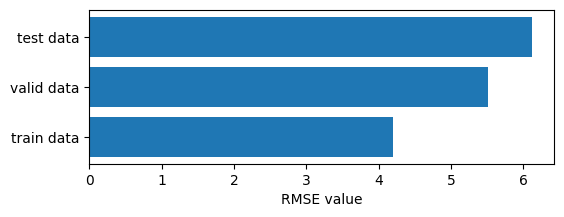

In [461]:
categories = ['train data', 'valid data', 'test data']
values = [train_RMSE, valid_RMSE, 6.34]

plt.figure(figsize=(6, 2))

plt.barh(categories, values)

plt.xlabel('RMSE value')

plt.show()


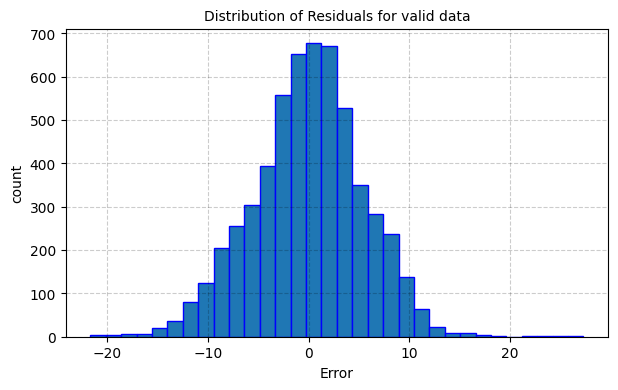

In [475]:
plt.figure(figsize=(7, 4))

residuals = valid_pred - y_valid

plt.hist(residuals, bins=32, edgecolor='b')

plt.xlabel('Error')
plt.ylabel('count')
plt.title('Distribution of Residuals for valid data', size=10)

plt.grid(c='#000', ls='--', alpha=0.2)
plt.show()

In [ ]:
plt.figure(figsize=(7, 4))

residuals = valid_pred - y_valid

plt.hist(residuals, bins=32, edgecolor='b')

plt.xlabel('Error')
plt.ylabel('count')
plt.title('Distribution of Residuals for valid data', size=10)

plt.grid(c='#000', ls='--', alpha=0.2)
plt.show()

<h4>Third approache - Ensembel Method (Blending)</h4>

In [462]:
y_valid1 = def_xgb_model.predict(X_valid)
y_valid2 = tune_xgb_model.predict(X_valid)
y_valid3 = Fselect_xgb_model.predict(X_valid[selected_features])
y_valid4 = def_rf_model.predict(X_valid)
y_valid5 = tune_rf_model.predict(X_valid)

data = {'y': y_valid,
        'y1': y_valid1,
        'y2': y_valid2,
        'y3': y_valid3,
        'y4': y_valid4,
        'y5': y_valid5}

ensemble_df = pd.DataFrame(data)

ensemble_y = ensemble_df['y']
ensemble_X = ensemble_df.drop(columns=['y'])

ensemble_model_rf = RandomForestRegressor(random_state=42)
ensemble_model_rf.fit(ensemble_X, ensemble_y)

valid_pred = ensemble_model_rf.predict(ensemble_X)

valid_RMSE = root_mean_squared_error(y_valid, valid_pred)
print('RMSE for valid data: ', valid_RMSE)

RMSE for valid data:  2.082000094867512


In [463]:
# RMSE for train data
y_train1 = def_xgb_model.predict(X_train)
y_train2 = tune_xgb_model.predict(X_train)
y_train3 = Fselect_xgb_model.predict(X_train[selected_features])
y_train4 = def_rf_model.predict(X_train)
y_train5 = tune_rf_model.predict(X_train)

data = {'y': y_train,
        'y1': y_train1,
        'y2': y_train2,
        'y3': y_train3,
        'y4': y_train4,
        'y5': y_train5}

ensemble_df = pd.DataFrame(data)

ensemble_y = ensemble_df['y']
ensemble_X = ensemble_df.drop(columns=['y'])

train_pred = ensemble_model_rf.predict(ensemble_X)

train_RMSE = root_mean_squared_error(y_train, train_pred)
print('RMSE for train data: ', train_RMSE)

RMSE for train data:  3.672531747589501


In [464]:
y_test1 = def_xgb_model.predict(X_test)
y_test2 = tune_xgb_model.predict(X_test)
y_test3 = Fselect_xgb_model.predict(X_test[selected_features])
y_test4 = def_rf_model.predict(X_test)
y_test5 = tune_rf_model.predict(X_test)

data = {
        'y1': y_test1,
        'y2': y_test2,
        'y3': y_test3,
        'y4': y_test4,
        'y5': y_test5}

ensemble_df = pd.DataFrame(data)

ensemble_X = ensemble_df

test_pred = ensemble_model_rf.predict(ensemble_X)

In [465]:
valid_pred_df = pd.DataFrame(test_pred)

output_df = pd.concat([ID, valid_pred_df], axis=1)
output_df.rename(columns={0:'Habitability_score'}, inplace=True)

output_df.to_csv('test prediction using ensemble method(Blending).csv', index=False) 

Root mean squard error for for test data is 6.22

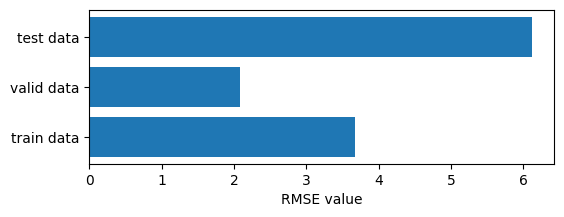

In [466]:
categories = ['train data', 'valid data', 'test data']
values = [train_RMSE, valid_RMSE, 6.22]

plt.figure(figsize=(6, 2))

plt.barh(categories, values)

plt.xlabel('RMSE value')

plt.show()

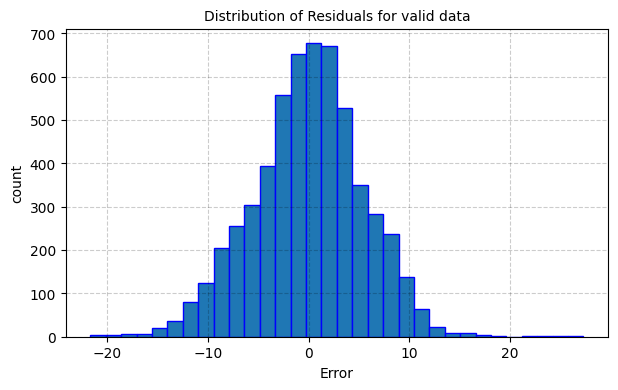

In [474]:
plt.figure(figsize=(7, 4))

residuals = valid_pred - y_valid

plt.hist(residuals, bins=32, edgecolor='b')

plt.xlabel('Error')
plt.ylabel('count')
plt.title('Distribution of Residuals for valid data', size=10)

plt.grid(c='#000', ls='--', alpha=0.2)
plt.show()

<h4>Third approache - Ensembel Method (Averaging)</h4>


In [467]:
# RMSE for train data
y_train1 = def_xgb_model.predict(X_train)
y_train2 = tune_xgb_model.predict(X_train)
y_train3 = Fselect_xgb_model.predict(X_train[selected_features])
y_train4 = def_rf_model.predict(X_train)
y_train5 = tune_rf_model.predict(X_train)

train_pred = (y_train1+y_train2+y_train3+y_train4+y_train5)/5
train_RMSE = root_mean_squared_error(y_train, train_pred)
print('RMSE for train data: ', train_RMSE)

RMSE for train data:  3.3579814452709025


In [468]:
y_valid1 = def_xgb_model.predict(X_valid)
y_valid2 = tune_xgb_model.predict(X_valid)
y_valid3 = Fselect_xgb_model.predict(X_valid[selected_features])
y_valid4 = def_rf_model.predict(X_valid)
y_valid5 = tune_rf_model.predict(X_valid)

valid_pred = (y_valid1+y_valid2+y_valid3+y_valid4+y_valid5)/5
valid_RMSE = root_mean_squared_error(y_valid, valid_pred)
print('RMSE for valid data: ', valid_RMSE)

RMSE for valid data:  5.458634171752453


In [469]:
y_test1 = def_xgb_model.predict(X_test)
y_test2 = tune_xgb_model.predict(X_test)
y_test3 = Fselect_xgb_model.predict(X_test[selected_features])
y_test4 = def_rf_model.predict(X_test)
y_test5 = tune_rf_model.predict(X_test)

test_pred = (y_test1+y_test2+y_test3+y_test4+y_test5)/5

In [470]:
valid_pred_df = pd.DataFrame(test_pred)

output_df = pd.concat([ID, valid_pred_df], axis=1)
output_df.rename(columns={0:'Habitability_score'}, inplace=True)

output_df.to_csv('test prediction using ensemble method(Averaging).csv', index=False) 

RMSE value for test data is 6.02

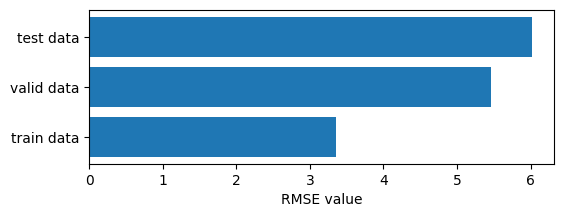

In [472]:
categories = ['train data', 'valid data', 'test data']
values = [train_RMSE, valid_RMSE, 6.02]

plt.figure(figsize=(6, 2))

plt.barh(categories, values)

plt.xlabel('RMSE value')

plt.show()

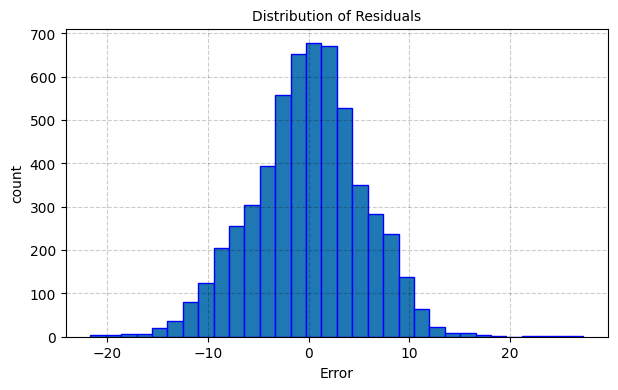

In [473]:
plt.figure(figsize=(7, 4))

residuals = valid_pred - y_valid

plt.hist(residuals, bins=32, edgecolor='b')

plt.xlabel('Error')
plt.ylabel('count')
plt.title('Distribution of Residuals for valid data', size=10)

plt.grid(c='#000', ls='--', alpha=0.2)
plt.show()

<h4>Final model train for all train and valid data and predict test data</h4>

I choose my final module as enseble model with averaging

In [476]:
y = df['Habitability_score']
X = df.drop(columns=['Habitability_score'])

In [477]:
def_xgb_model = XGBRegressor(objective='reg:squarederror',random_state=42)
def_xgb_model.fit(X, y)

def_rf_model = RandomForestRegressor(n_estimators=450, random_state=42)
def_rf_model.fit(X, y)

tune_xgb_model = XGBRegressor(objective='reg:squarederror', colsample_bytree= 1.0, gamma= 0.1, learning_rate= 0.05, max_depth= 10, min_child_weight= 5, n_estimators= 100, reg_alpha= 0, reg_lambda= 0.5, subsample= 0.8 ,random_state=42)
tune_xgb_model.fit(X, y)

Fselect_xgb_model = XGBRegressor(objective='reg:squarederror', colsample_bytree= 1.0, gamma= 0.1, learning_rate= 0.05, max_depth= 10, min_child_weight= 5, n_estimators= 100, reg_alpha= 0, reg_lambda= 0.5, subsample= 0.8 ,random_state=42)
Fselect_xgb_model.fit(X[selected_features], y)

tune_rf_model = RandomForestRegressor(bootstrap= False, max_depth= 20, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 450, random_state=42)
tune_rf_model.fit(X, y)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_split=5, n_estimators=450, random_state=42)

In [478]:
y_test1 = def_xgb_model.predict(X_test)
y_test2 = tune_xgb_model.predict(X_test)
y_test3 = Fselect_xgb_model.predict(X_test[selected_features])
y_test4 = def_rf_model.predict(X_test)
y_test5 = tune_rf_model.predict(X_test)

test_pred = (y_test1+y_test2+y_test3+y_test4+y_test5)/5

In [479]:
valid_pred_df = pd.DataFrame(test_pred)

output_df = pd.concat([ID, valid_pred_df], axis=1)
output_df.rename(columns={0:'Habitability_score'}, inplace=True)

output_df.to_csv('Final prediction.csv', index=False) 

Final RMSE for test data is 5.85

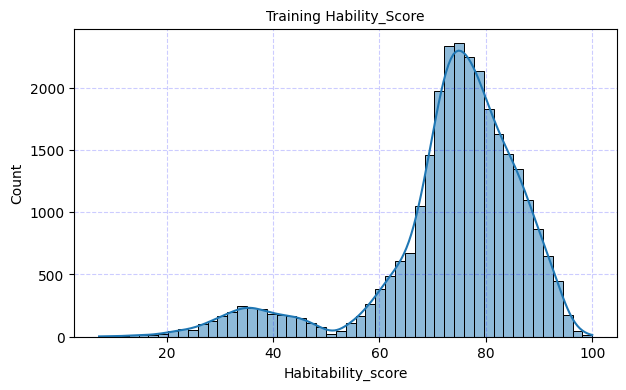

In [488]:
plt.figure(figsize=(7, 4))
sns.histplot(data=df, x='Habitability_score', kde=True, bins=50)
plt.title("Training Hability_Score", size=10)
plt.grid(ls="--", c='b', alpha=0.2)
plt.show()

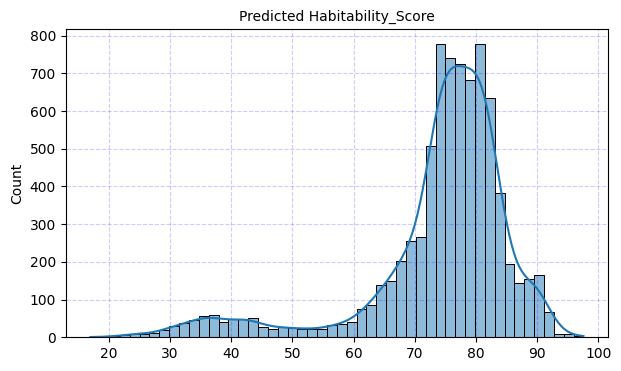

In [486]:
plt.figure(figsize=(7, 4))
sns.histplot(x=test_pred, kde=True, bins=50)

plt.title("Predicted Habitability_Score", size=10)
plt.grid(ls="--", c='b', alpha=0.2)
plt.show()